In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df = pd.read_excel('data/expulsion_processed_2016_11_23.xlsx', sheetname='python')
df

,colonizer,squid,expelled
0,Apo,1,0.000000
1,Apo,2,0.000000
2,Apo,3,0.000000
3,Apo,4,0.000000
4,Apo,5,0.000000
5,MJM1100,2,8.350649
6,MJM1100,4,21.945578
7,MJM1100,6,4.919453
8,MJM1100,8,54.038095
9,MJM1100,10,1.928445


# Plot using seaborn
## https://stanford.edu/~mwaskom/software/seaborn/examples/scatterplot_categorical.html

### I used a striplot since I do not have a lot of overlapping points
#### http://seaborn.pydata.org/generated/seaborn.stripplot.html

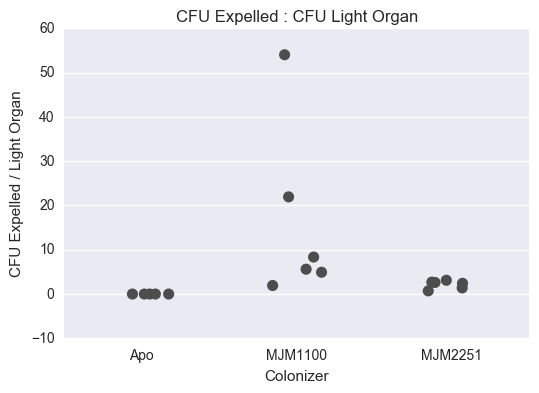

In [78]:
graph = sns.stripplot(x='colonizer', y='expelled', data=df, jitter=.2, color='0.3',size=8)
graph.set(xlabel='Colonizer',ylabel='CFU Expelled / Light Organ',title='CFU Expelled : CFU Light Organ')

[None,
 (0.5, 100),

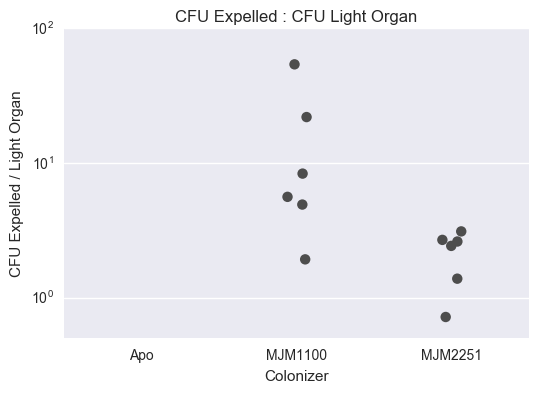

In [116]:
#or with log scale
graph = sns.stripplot(x='colonizer', y='expelled', data=df, jitter=0.1, color='0.3', size=7.5)
#graph.set_yscale('log')
#graph.set_ylim([1,100])
graph.set(yscale='log',ylim=[.5,100],
          xlabel='Colonizer',ylabel='CFU Expelled / Light Organ',title='CFU Expelled : CFU Light Organ')

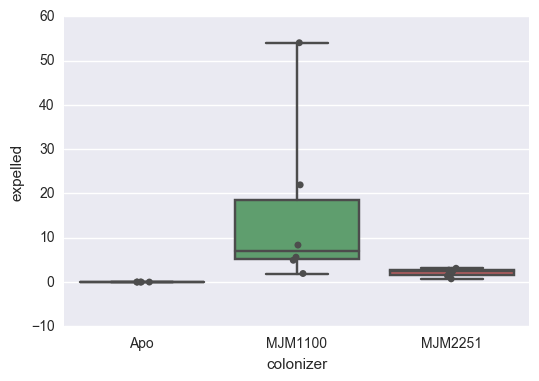

In [111]:
#looks like I can add boxplot, but need to use matplotlib to incorporate median or change scale
graph = sns.boxplot(x='colonizer', y='expelled', data=df, whis=np.inf)
graph = sns.stripplot(x='colonizer', y='expelled', data=df, jitter=0.05, color='0.3')


In [61]:
"""
df_medians = df.groupby(['colonizer'])['expelled'].apply(np.median)
df_medians
"""

m = df.groupby(['colonizer'])['expelled'].apply(np.median)
m.name = 'MEDIAN'

df_medians = df.join(m, on=['colonizer'])
df_medians

,colonizer,squid,expelled,MEDIAN
0,Apo,1,0.000000,0.000000
1,Apo,2,0.000000,0.000000
2,Apo,3,0.000000,0.000000
3,Apo,4,0.000000,0.000000
4,Apo,5,0.000000,0.000000
5,MJM1100,2,8.350649,6.981544
6,MJM1100,4,21.945578,6.981544
7,MJM1100,6,4.919453,6.981544
8,MJM1100,8,54.038095,6.981544
9,MJM1100,10,1.928445,6.981544


## Using Matplotlib

ValueError: First argument must be a sequence

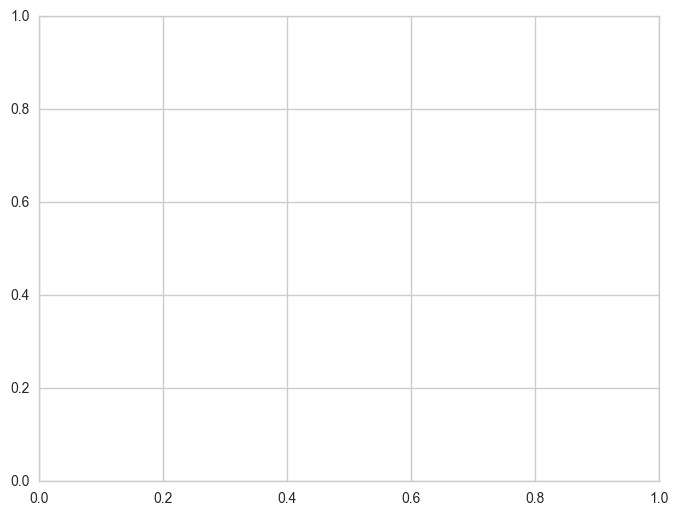

In [30]:
#DOES NOT WORK, cannot handle categorical variable

# Create a new figure of size 8x6 points, using 100 dots per inch
plt.figure(figsize=(8,6), dpi=100)

# Create a new subplot from a grid of 1x1
plt.subplot(111)

plt.scatter(x='colonizer',y='expelled', data = df, marker='o', s=75,
            color='gray', linewidths=2, alpha=0.7)
'''
plt.scatter(df.groupby('colonizer', as_index=False).median()['colonizer'], 
            df.groupby('colonizer', as_index=False).median()['expelled'], marker='_', s=500,
            color='black', linewidths=2, alpha=1.0)
'''
# Show result on screen
plt.show()